## TIME COMPLEXITY 

In [7]:
import math
import time
import timeit
import re
import psutil
import statistics
from matplotlib import pyplot as plt

In [8]:
def fibonacci_constant_time(n):
    phi = (1 + math.sqrt(5)) / 2
    return round((phi**n - (-phi)**(-n)) / math.sqrt(5))


def fibonacci_for_loop(n):
    if n == 0:
        return 0
    one,two = 0,1
    for _ in range(n-1):
        temp = two
        two = one+two
        one = temp        
    return two    


def fibonacci_while_loop(n):
    if n == 0:
        return 0
    one,two = 0, 1
    while n > 1:
        temp = two
        two = one + two
        one = temp
        n -= 1
    return two

def fibonacci_log_n(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1

    def multiply(matrix1, matrix2):
        return [[matrix1[0][0]*matrix2[0][0] + matrix1[0][1]*matrix2[1][0], matrix1[0][0]*matrix2[0][1] + matrix1[0][1]*matrix2[1][1]],
                [matrix1[1][0]*matrix2[0][0] + matrix1[1][1]*matrix2[1][0], matrix1[1][0]*matrix2[0][1] + matrix1[1][1]*matrix2[1][1]]]

    def power(matrix, k):
        if k == 1:
            return matrix
        elif k % 2 == 0:
            half_pow = power(matrix, k // 2)
            return multiply(half_pow, half_pow)
        else:
            return multiply(matrix, power(matrix, k - 1))

    base_matrix = [[1, 1], [1, 0]]
    return power(base_matrix, n - 1)[0][0]


def fibonacci_recursion(n):
    if n <= 1:
        return n
    else:
        return (fibonacci_recursion(n-1) + fibonacci_recursion(n-2))


def fibonacci_dynamic_programming_tabulation(n):
    if n < 2:
         return n
    memo = [0] * (n+1)
    memo[1] = 1
    for i in range(2,n+1):
           memo[i] = memo[i-1] + memo[i-2]   
    return memo[n]


def fibonacci_dynamic_programming_memoization(n):
    memo = [0,1]
    if n == 0:
        return 0
    for _ in range(n-1):
        memo.append(memo[-1]+memo[-2])
    return memo[-1]


memo_1 = [0, 1]
def fibonacci_dynamic_programming_memoization_1(n):
    global memo_1  
    if n < len(memo_1):
        return memo_1[n]

    for _ in range(len(memo_1), n + 1):
        memo_1.append(memo_1[-1] + memo_1[-2])

    return memo_1[-1]


def fibonacci_dynamic_programming_memoization_2(n, memo_2={}):
    if n <= 1:
        return n

    if n not in memo_2:
        memo_2[n] = fibonacci_dynamic_programming_memoization_2(n-1, memo_2) + fibonacci_dynamic_programming_memoization_2(n-2, memo_2)

    return memo_2[n]

In [9]:
x = 7
y = 33

print(f'fibonacci_constant_time for n = {x} is {fibonacci_constant_time(x)} and for n = {y} is {fibonacci_constant_time(y)}')
print(f'fibonacci_for_loop for n = {x} is {fibonacci_for_loop(x)} and for n = {y} is {fibonacci_for_loop(y)}')
print(f'fibonacci_while_loop for n = {x} is {fibonacci_while_loop(x)} and for n = {y} is {fibonacci_while_loop(y)}')
print(f'fibonacci_log_n for n = {x} is {fibonacci_log_n(x)} and for n = {y} is {fibonacci_log_n(y)}')
print(f'fibonacci_recursion for n = {x} is {fibonacci_recursion(x)} and for n = {y} is {fibonacci_recursion(y)}')
print(f'fibonacci_dynamic_programming_tabulation for n = {x} is {fibonacci_dynamic_programming_tabulation(x)} and for n = {y} is {fibonacci_dynamic_programming_tabulation(y)}')
print(f'fibonacci_dynamic_programming_memoization for n = {x} is {fibonacci_dynamic_programming_memoization(x)} and for n = {y} is {fibonacci_dynamic_programming_memoization(y)}')
print(f'fibonacci_dynamic_programming_memoization_1 for n = {x} is {fibonacci_dynamic_programming_memoization_1(x)} and for n = {y} is {fibonacci_dynamic_programming_memoization_1(y)}')
print(f'fibonacci_dynamic_programming_memoization_2 for n = {x} is {fibonacci_dynamic_programming_memoization_2(x)} and for n = {y} is {fibonacci_dynamic_programming_memoization_2(y)}')

fibonacci_constant_time for n = 7 is 13 and for n = 33 is 3524578
fibonacci_for_loop for n = 7 is 13 and for n = 33 is 3524578
fibonacci_while_loop for n = 7 is 13 and for n = 33 is 3524578
fibonacci_log_n for n = 7 is 13 and for n = 33 is 3524578
fibonacci_recursion for n = 7 is 13 and for n = 33 is 3524578
fibonacci_dynamic_programming_tabulation for n = 7 is 13 and for n = 33 is 3524578
fibonacci_dynamic_programming_memoization for n = 7 is 13 and for n = 33 is 3524578
fibonacci_dynamic_programming_memoization_1 for n = 7 is 13 and for n = 33 is 3524578
fibonacci_dynamic_programming_memoization_2 for n = 7 is 13 and for n = 33 is 3524578


In [10]:
array_time_fibonacci_constant_time = []
array_time_fibonacci_for_loop = []
array_time_fibonacci_while_loop = []
array_time_fibonacci_log_n = []
array_time_fibonacci_recursion = []
array_time_fibonacci_dynamic_programming_tabulation= []
array_time_fibonacci_dynamic_programming_memoization = []
array_time_fibonacci_dynamic_programming_memoization_1 = []
array_time_fibonacci_dynamic_programming_memoization_2 = []

In [11]:
for i in range(100):  
    start_fibonacci_constant_time = time.time_ns()
    fibonacci_constant_time(i)
    end_fibonacci_constant_time = time.time_ns()
    array_time_fibonacci_constant_time.append(end_fibonacci_constant_time - start_fibonacci_constant_time)  

In [12]:
for i in range(100):  
    start_fibonacci_for_loop = time.time_ns()
    fibonacci_for_loop(i)
    end_fibonacci_for_loop = time.time_ns()
    array_time_fibonacci_for_loop.append(end_fibonacci_for_loop - start_fibonacci_for_loop)  

In [13]:
for i in range(40):
    start_fibonacci_recursion = time.time_ns()
    fibonacci_recursion(i)
    end_fibonacci_recursion = time.time_ns()
    array_time_fibonacci_recursion.append(end_fibonacci_recursion - start_fibonacci_recursion)

In [14]:
for i in range(100):  
    start_fibonacci_log_n = time.time_ns()
    fibonacci_log_n(i)
    end_fibonacci_log_n = time.time_ns()
    array_time_fibonacci_log_n.append(end_fibonacci_log_n - start_fibonacci_log_n) 

In [15]:
for i in range(100):
    start_fibonacci_dynamic_programming_tabulation = time.time_ns()
    fibonacci_dynamic_programming_tabulation(i)
    end_fibonacci_dynamic_programming_tabulation = time.time_ns()
    array_time_fibonacci_dynamic_programming_tabulation.append(end_fibonacci_dynamic_programming_tabulation - start_fibonacci_dynamic_programming_tabulation)

In [16]:
for i in range(100):
    start_fibonacci_dynamic_programming_memoization = time.time_ns()
    fibonacci_dynamic_programming_memoization(i)
    end_fibonacci_dynamic_programming_memoization = time.time_ns()
    array_time_fibonacci_dynamic_programming_memoization.append(end_fibonacci_dynamic_programming_memoization - start_fibonacci_dynamic_programming_memoization)

In [17]:
for i in range(100): 
    start_fibonacci_while_loop = time.time_ns()
    fibonacci_while_loop(i)
    end_fibonacci_while_loop = time.time_ns()
    array_time_fibonacci_while_loop.append(end_fibonacci_while_loop - start_fibonacci_while_loop)

In [18]:
for i in range(100):
    start_fibonacci_dynamic_programming_memoization_1 = time.time_ns()
    fibonacci_dynamic_programming_memoization_1(i)
    end_fibonacci_dynamic_programming_memoization_1 = time.time_ns()
    array_time_fibonacci_dynamic_programming_memoization_1.append(end_fibonacci_dynamic_programming_memoization_1 - start_fibonacci_dynamic_programming_memoization_1)

In [19]:
for i in range(100):
    start_fibonacci_dynamic_programming_memoization_2 = time.time_ns()
    fibonacci_dynamic_programming_memoization_2(i)
    end_fibonacci_dynamic_programming_memoization_2 = time.time_ns()
    array_time_fibonacci_dynamic_programming_memoization_2.append(end_fibonacci_dynamic_programming_memoization_2 - start_fibonacci_dynamic_programming_memoization_2)

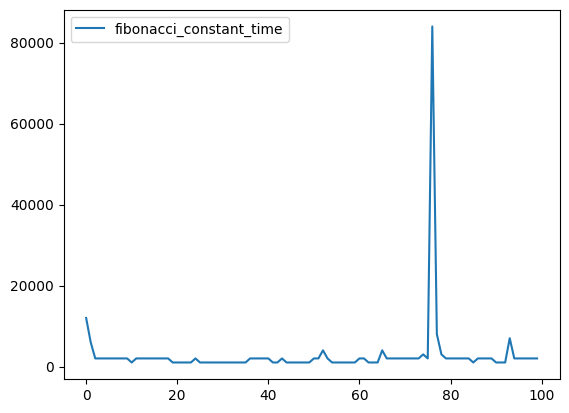

In [20]:
x_0 = [x for x in range(100)]
y_0 = array_time_fibonacci_constant_time
plt.plot(x_0, y_0, label='fibonacci_constant_time')
plt.legend()
plt.show()

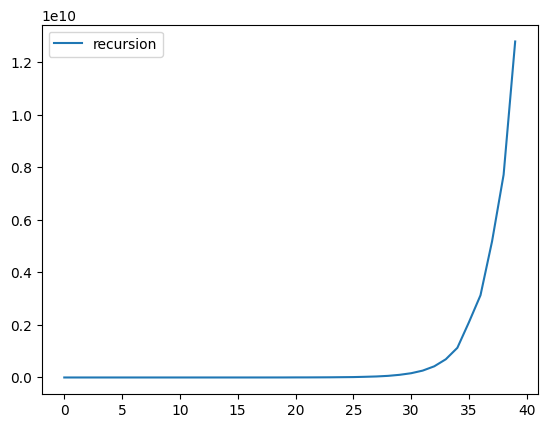

In [21]:
x_1 = [x for x in range(40)]
y_1 = array_time_fibonacci_recursion
plt.plot(x_1, y_1, label='recursion')
plt.legend()
plt.show()

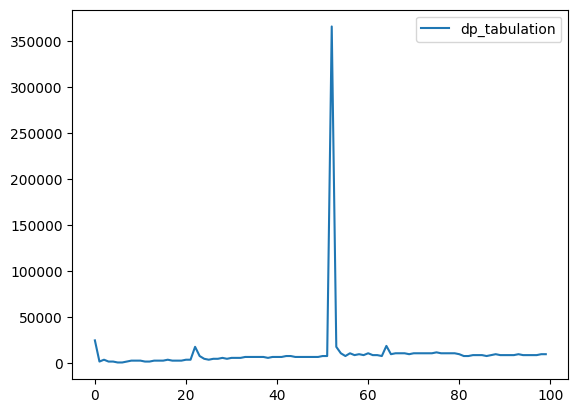

In [22]:
x_2 = [x for x in range(100)]
y_2 = array_time_fibonacci_dynamic_programming_tabulation
plt.plot(x_2, y_2, label='dp_tabulation')
plt.legend()
plt.show()

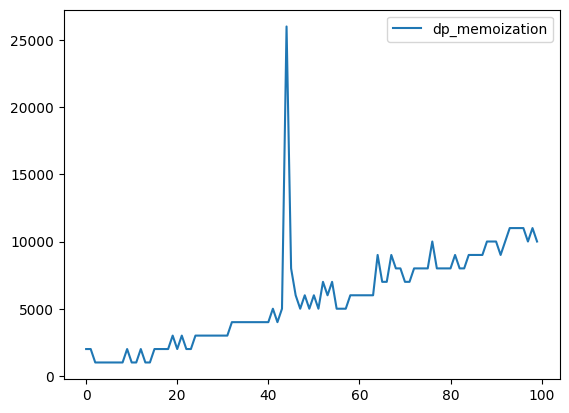

In [23]:
x_3 = [x for x in range(100)]
y_3  = array_time_fibonacci_dynamic_programming_memoization
plt.plot(x_3, y_3, label='dp_memoization')
plt.legend()
plt.show()

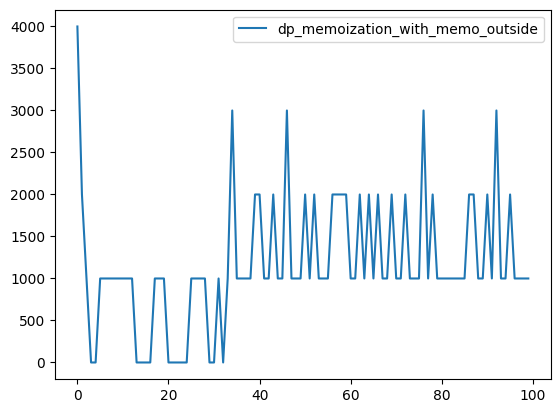

In [24]:
x_3_1 = [x for x in range(100)]
y_3_1  = array_time_fibonacci_dynamic_programming_memoization_1
plt.plot(x_3_1, y_3_1, label='dp_memoization_with_memo_outside')
plt.legend()
plt.show()

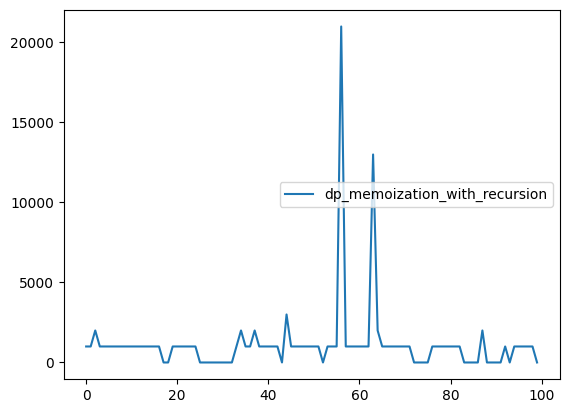

In [25]:
x_3_2 = [x for x in range(100)]
y_3_2  = array_time_fibonacci_dynamic_programming_memoization_2
plt.plot(x_3_2, y_3_2, label='dp_memoization_with_recursion')
plt.legend()
plt.show()

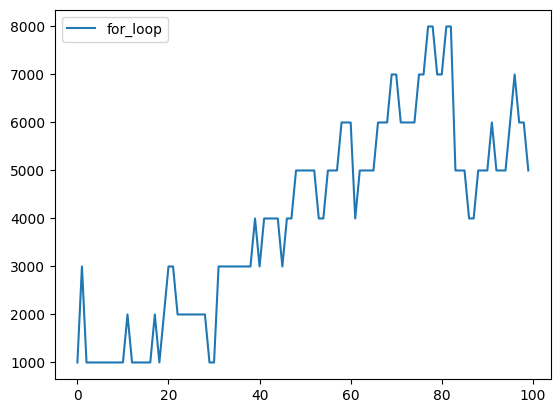

In [26]:
x_4 = [x for x in range(100)]
y_4 = array_time_fibonacci_for_loop
plt.plot(x_4, y_4, label='for_loop')
plt.legend()
plt.show()

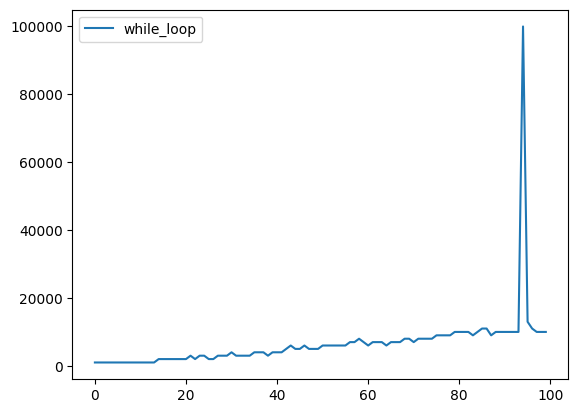

In [27]:
x_5 = [x for x in range(100)]
y_5 = array_time_fibonacci_while_loop
plt.plot(x_5, y_5, label='while_loop')
plt.legend()
plt.show()

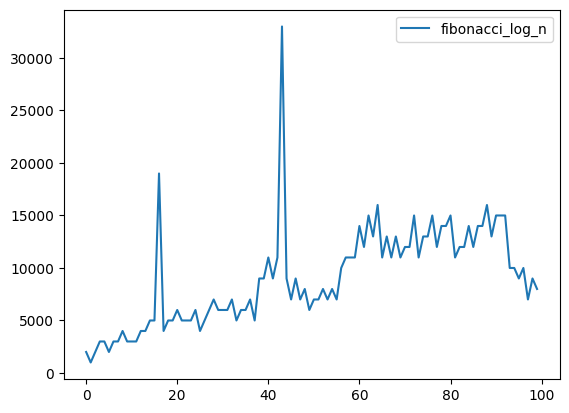

In [28]:
x_6 = [x for x in range(100)]
y_6 = array_time_fibonacci_log_n
plt.plot(x_6, y_6, label='fibonacci_log_n')
plt.legend()
plt.show()

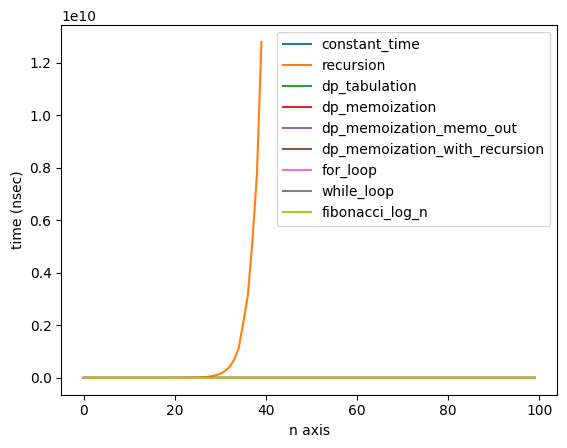

In [29]:
x_0 = [x for x in range(100)]
y_0 = array_time_fibonacci_constant_time

x_1 = [x for x in range(40)]
y_1 = array_time_fibonacci_recursion

x_2 = [x for x in range(100)]
y_2 = array_time_fibonacci_dynamic_programming_tabulation

x_3 = [x for x in range(100)]
y_3  = array_time_fibonacci_dynamic_programming_memoization

x_3_1 = [x for x in range(100)]
y_3_1  = array_time_fibonacci_dynamic_programming_memoization_1

x_3_2 = [x for x in range(100)]
y_3_2  = array_time_fibonacci_dynamic_programming_memoization_2

x_4 = [x for x in range(100)]
y_4 = array_time_fibonacci_for_loop

x_5 = [x for x in range(100)]
y_5 = array_time_fibonacci_while_loop

x_6 = [x for x in range(100)]
y_6 = array_time_fibonacci_log_n

plt.plot(x_0, y_0, label='constant_time')
plt.plot(x_1, y_1, label='recursion')
plt.plot(x_2, y_2, label='dp_tabulation')
plt.plot(x_3, y_3, label='dp_memoization')
plt.plot(x_3_1, y_3_1, label='dp_memoization_memo_out')
plt.plot(x_3_2, y_3_2, label='dp_memoization_with_recursion')
plt.plot(x_4, y_4, label='for_loop')
plt.plot(x_5, y_5, label='while_loop')
plt.plot(x_6, y_6, label='fibonacci_log_n')

plt.legend()
plt.xlabel('n axis')
plt.ylabel('time (nsec)')
 
plt.show()

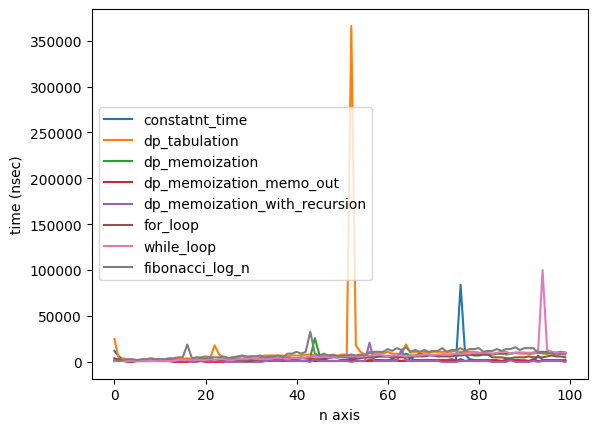

In [30]:
x_0 = [x for x in range(100)]
y_0 = array_time_fibonacci_constant_time

x_2 = [x for x in range(100)]
y_2 = array_time_fibonacci_dynamic_programming_tabulation

x_3 = [x for x in range(100)]
y_3  = array_time_fibonacci_dynamic_programming_memoization

x_3_1 = [x for x in range(100)]
y_3_1  = array_time_fibonacci_dynamic_programming_memoization_1

x_3_2 = [x for x in range(100)]
y_3_2  = array_time_fibonacci_dynamic_programming_memoization_2

x_4 = [x for x in range(100)]
y_4 = array_time_fibonacci_for_loop

x_5 = [x for x in range(100)]
y_5 = array_time_fibonacci_while_loop

x_6 = [x for x in range(100)]
y_6 = array_time_fibonacci_log_n

plt.plot(x_0, y_0, label='constatnt_time')
plt.plot(x_2, y_2, label='dp_tabulation')
plt.plot(x_3, y_3, label='dp_memoization')
plt.plot(x_3_1, y_3_1, label='dp_memoization_memo_out')
plt.plot(x_3_2, y_3_2, label ='dp_memoization_with_recursion')
plt.plot(x_4, y_4, label='for_loop')
plt.plot(x_5, y_5, label='while_loop')
plt.plot(x_6, y_6, label='fibonacci_log_n')

plt.xlabel('n axis')
plt.ylabel('time (nsec)')
#plt.title('')
plt.legend()
plt.show()

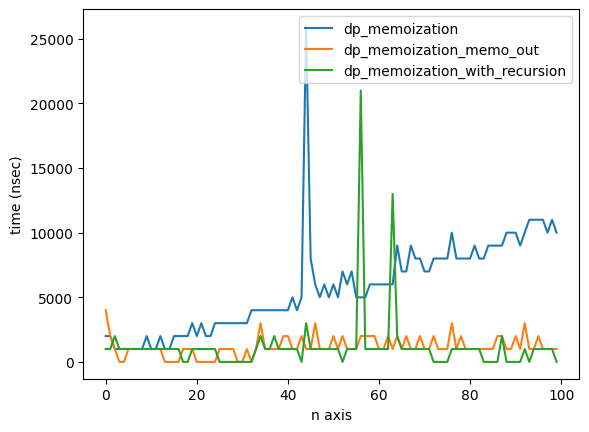

In [31]:
x_3 = [x for x in range(100)]
y_3  = array_time_fibonacci_dynamic_programming_memoization

x_3_1 = [x for x in range(100)]
y_3_1  = array_time_fibonacci_dynamic_programming_memoization_1

x_3_2 = [x for x in range(100)]
y_3_2  = array_time_fibonacci_dynamic_programming_memoization_2

plt.plot(x_3, y_3, label='dp_memoization')
plt.plot(x_3_1, y_3_1, label='dp_memoization_memo_out')
plt.plot(x_3_2, y_3_2, label ='dp_memoization_with_recursion')

plt.xlabel('n axis')
plt.ylabel('time (nsec)')
#plt.title('')
plt.legend()
plt.show()

In [32]:
timeit_fibonacci_constant_time = []
timeit_fibonacci_for_loop = []
timeit_fibonacci_while_loop = []
timeit_fibonacci_log_n= []
timeit_fibonacci_dynamic_programming_tabulation = []
timeit_fibonacci_dynamic_programming_memoization = []
timeit_fibonacci_dynamic_programming_memo_out = []
timeit_fibonacci_dynamic_programming_memoization_with_recursion = []

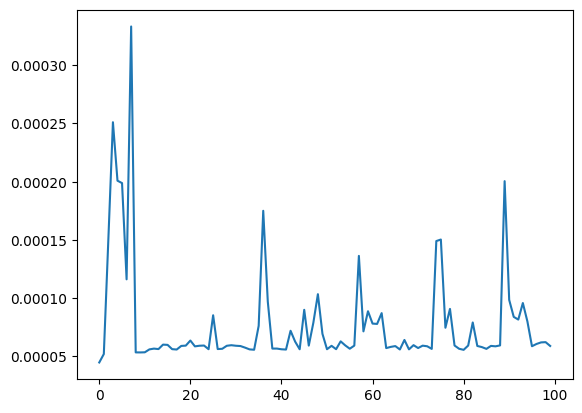

In [33]:
for n in range(100):
    results_fibonacci_constant_time = timeit.repeat("fibonacci_constant_time(n)", globals=globals(), number=100, repeat=10)
    mean_result_fibonacci_constatnt_time = statistics.mean(results_fibonacci_constant_time)
    time_info_fibonacci_constatnt_time = re.search(r"(\d+\.\d+e?-?\d*)", str(mean_result_fibonacci_constatnt_time)).group(0)
    timeit_fibonacci_constant_time.append(float(time_info_fibonacci_constatnt_time))

x = list(range(100))
y = timeit_fibonacci_constant_time

plt.plot(x,y)
plt.show()

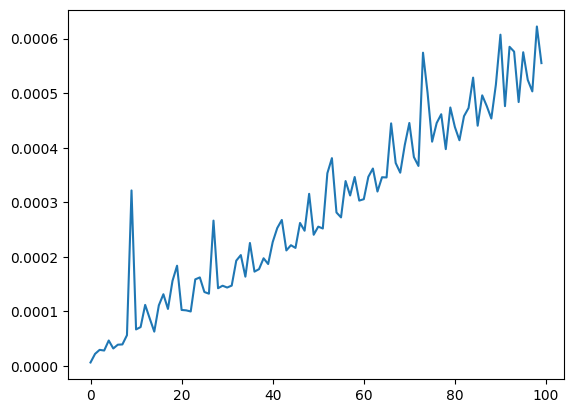

In [34]:
for n in range(100):
    results_fibonacci_for_loop = timeit.repeat("fibonacci_for_loop(n)", globals=globals(), number=100, repeat=10)
    mean_result_fibonacci_for_loop = statistics.mean(results_fibonacci_for_loop)
    time_info_fibonacci_for_loop = re.search(r"(\d+\.\d+e?-?\d*)", str(mean_result_fibonacci_for_loop)).group(0)
    timeit_fibonacci_for_loop.append(float(time_info_fibonacci_for_loop))

x = list(range(100))
y = timeit_fibonacci_for_loop

plt.plot(x,y)
plt.show()

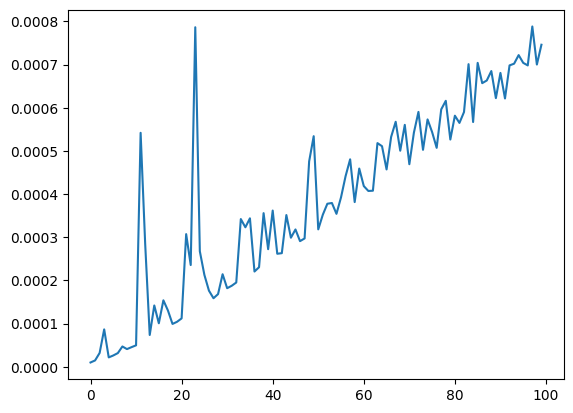

In [35]:
for n in range(100):
    results_fibonacci_while_loop = timeit.repeat("fibonacci_while_loop(n)", globals=globals(), number=100, repeat=10)
    mean_result_fibonacci_while_loop = statistics.mean(results_fibonacci_while_loop)
    time_info_fibonacci_while_loop = re.search(r"(\d+\.\d+e?-?\d*)", str(mean_result_fibonacci_while_loop)).group(0)
    timeit_fibonacci_while_loop.append(float(time_info_fibonacci_while_loop))

x = list(range(100))
y = timeit_fibonacci_while_loop

plt.plot(x,y)
plt.show()

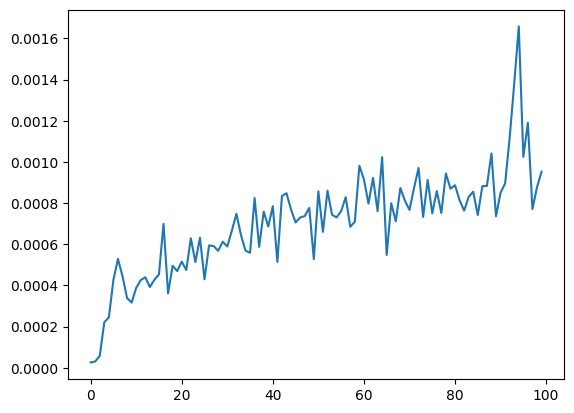

In [36]:
for n in range(100):
    results_fibonacci_log_n = timeit.repeat("fibonacci_log_n(n)", globals=globals(), number=100, repeat=10)
    mean_result_fibonacci_log_n = statistics.mean(results_fibonacci_log_n)
    time_info_fibonacci_log_n = re.search(r"(\d+\.\d+e?-?\d*)", str(mean_result_fibonacci_log_n)).group(0)
    timeit_fibonacci_log_n.append(float(time_info_fibonacci_log_n))

x = list(range(100))
y = timeit_fibonacci_log_n

plt.plot(x,y)
plt.show()

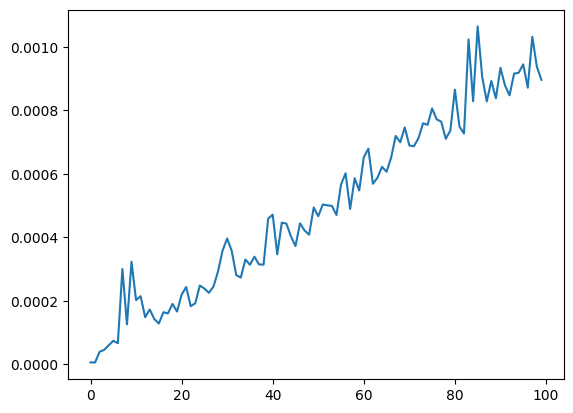

In [37]:
for n in range(100):
    results_fibonacci_dynamic_programming_tabulation = timeit.repeat("fibonacci_dynamic_programming_tabulation(n)", globals=globals(), number=100, repeat=10)
    mean_result_fibonacci_dynamic_programming_tabulation = statistics.mean(results_fibonacci_dynamic_programming_tabulation)
    time_info_fibonacci_dynamic_programming_tabulation = re.search(r"(\d+\.\d+e?-?\d*)", str(mean_result_fibonacci_dynamic_programming_tabulation)).group(0)
    timeit_fibonacci_dynamic_programming_tabulation.append(float(time_info_fibonacci_dynamic_programming_tabulation))

x = list(range(100))
y = timeit_fibonacci_dynamic_programming_tabulation

plt.plot(x, timeit_fibonacci_dynamic_programming_tabulation)
plt.show()

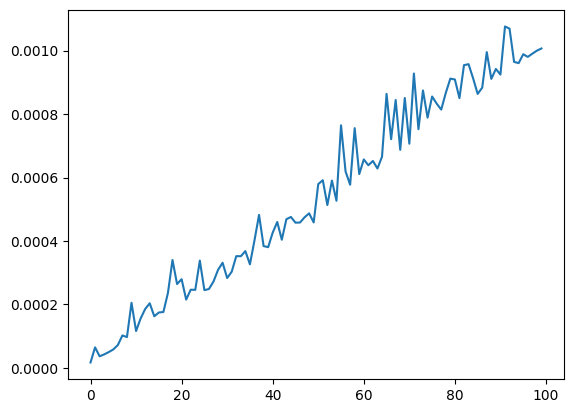

In [38]:
for n in range(100):
    results_fibonacci_dynamic_programming_memoization = timeit.repeat("fibonacci_dynamic_programming_memoization(n)", globals=globals(), number=100, repeat=10)
    mean_result_fibonacci_dynamic_programming_memoization = statistics.mean(results_fibonacci_dynamic_programming_memoization)
    time_info_fibonacci_dynamic_programming_memoization = re.search(r"(\d+\.\d+e?-?\d*)", str(mean_result_fibonacci_dynamic_programming_memoization)).group(0)
    timeit_fibonacci_dynamic_programming_memoization.append(float(time_info_fibonacci_dynamic_programming_memoization))

x = list(range(100))
y = timeit_fibonacci_dynamic_programming_memoization

plt.plot(x,y)
plt.show()

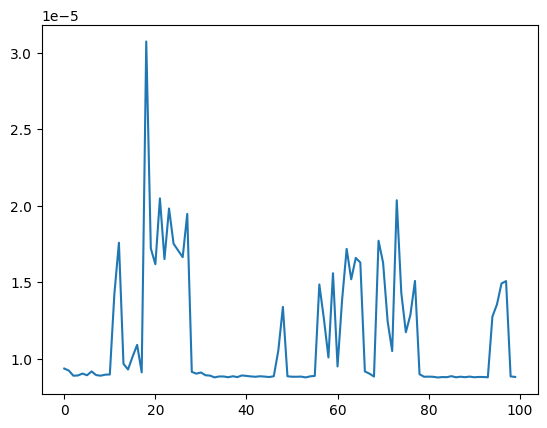

In [39]:
for n in range(100):
    results_fibonacci_dynamic_programming_memoization_1 = timeit.repeat("fibonacci_dynamic_programming_memoization_1(n)", globals=globals(), number=100, repeat=10)
    mean_result_fibonacci_dynamic_programming_memoization_1 = statistics.mean(results_fibonacci_dynamic_programming_memoization_1)
    time_info_fibonacci_dynamic_programming_memoization_1 = re.search(r"(\d+\.\d+e?-?\d*)", str(mean_result_fibonacci_dynamic_programming_memoization_1)).group(0)
    timeit_fibonacci_dynamic_programming_memo_out.append(float(time_info_fibonacci_dynamic_programming_memoization_1))

x = list(range(100))
y = timeit_fibonacci_dynamic_programming_memo_out

plt.plot(x,y)
plt.show()

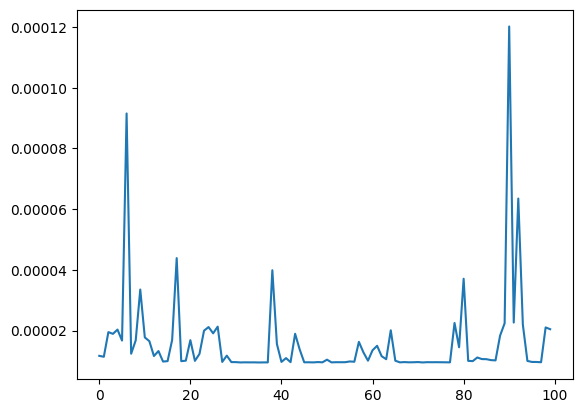

In [40]:
for n in range(100):
    results_fibonacci_dynamic_programming_memoization_2 = timeit.repeat("fibonacci_dynamic_programming_memoization_2(n)", globals=globals(), number=100, repeat=10)
    mean_result_fibonacci_dynamic_programming_memoization_2 = statistics.mean(results_fibonacci_dynamic_programming_memoization_2)
    time_info_fibonacci_dynamic_programming_memoization_2 = re.search(r"(\d+\.\d+e?-?\d*)", str(mean_result_fibonacci_dynamic_programming_memoization_2)).group(0)
    timeit_fibonacci_dynamic_programming_memoization_with_recursion.append(float(time_info_fibonacci_dynamic_programming_memoization_2))

x = list(range(100))
y = timeit_fibonacci_dynamic_programming_memoization_with_recursion

plt.plot(x,y)
plt.show()

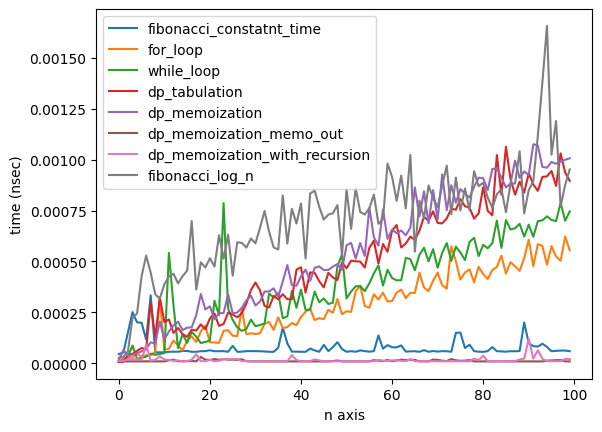

In [41]:
x = list(range(100))
y_0 = timeit_fibonacci_constant_time
y_1 = timeit_fibonacci_for_loop
y_2 = timeit_fibonacci_while_loop
y_3 = timeit_fibonacci_dynamic_programming_tabulation
y_4 = timeit_fibonacci_dynamic_programming_memoization
y_4_1 = timeit_fibonacci_dynamic_programming_memo_out
y_4_2 = timeit_fibonacci_dynamic_programming_memoization_with_recursion
y_5 = timeit_fibonacci_log_n

plt.plot(x, y_0, label = "fibonacci_constatnt_time")
plt.plot(x, y_1, label = 'for_loop')
plt.plot(x, y_2, label = 'while_loop')
plt.plot(x, y_3, label = 'dp_tabulation')
plt.plot(x, y_4, label = 'dp_memoization')
plt.plot(x, y_4_1, label = 'dp_memoization_memo_out')
plt.plot(x, y_4_2, label = 'dp_memoization_with_recursion')
plt.plot(x, y_5, label = 'fibonacci_log_n')

plt.xlabel('n axis')
plt.ylabel('time (nsec)')
#plt.title('')
plt.legend()
plt.show()

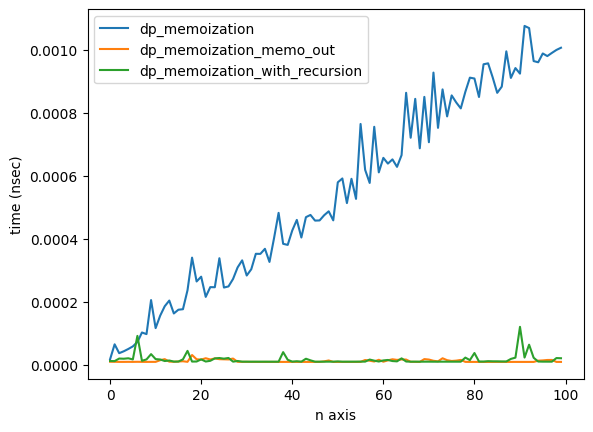

In [42]:
x = list(range(100))
y_4 = timeit_fibonacci_dynamic_programming_memoization
y_4_1 = timeit_fibonacci_dynamic_programming_memo_out
y_4_2 = timeit_fibonacci_dynamic_programming_memoization_with_recursion

plt.plot(x, y_4, label = 'dp_memoization')
plt.plot(x, y_4_1, label = 'dp_memoization_memo_out')
plt.plot(x, y_4_2, label = 'dp_memoization_with_recursion')

plt.xlabel('n axis')
plt.ylabel('time (nsec)')
#plt.title('')
plt.legend()
plt.show()

In [43]:
# List to store memory usage for each function
memory_usage_lists = {
    "Constatnt Time": [],
    "For Loop": [],
    "While Loop": [],
    "Fibonacci_log_n": [],
    "Recursion": [],
    "Dynamic Tabulation": [],
    "Dynamic Memoization": [],
    "Dynamic Memoization 1": [],
    "Dynamic Memoization with Recursion": [],
}

In [44]:
n_values = list(range(100))

# Measure memory usage for each n and each function
for n in n_values:
    memory_before = psutil.virtual_memory().used
    fibonacci_constant_time(n)
    memory_after = psutil.virtual_memory().used
    memory_used = memory_after - memory_before
    memory_usage_lists["Constatnt Time"].append(memory_used)
    
    memory_before = psutil.virtual_memory().used
    fibonacci_for_loop(n)
    memory_after = psutil.virtual_memory().used
    memory_used = memory_after - memory_before
    memory_usage_lists["For Loop"].append(memory_used)

    memory_before = psutil.virtual_memory().used
    fibonacci_while_loop(n)
    memory_after = psutil.virtual_memory().used
    memory_used = memory_after - memory_before
    memory_usage_lists["While Loop"].append(memory_used)

    memory_before = psutil.virtual_memory().used
    fibonacci_log_n(n)
    memory_after = psutil.virtual_memory().used
    memory_used = memory_after - memory_before
    memory_usage_lists["Fibonacci_log_n"].append(memory_used)

    if n <= 40:  # Limit recursion due to performance
        memory_before = psutil.virtual_memory().used
        fibonacci_recursion(n)
        memory_after = psutil.virtual_memory().used
        memory_used = abs(memory_after - memory_before)  # Take the absolute value
        memory_usage_lists["Recursion"].append(memory_used)

    memory_before = psutil.virtual_memory().used
    fibonacci_dynamic_programming_tabulation(n)
    memory_after = psutil.virtual_memory().used
    memory_used = memory_after - memory_before
    memory_usage_lists["Dynamic Tabulation"].append(memory_used)


    memory_before = psutil.virtual_memory().used
    fibonacci_dynamic_programming_memoization(n)
    memory_after = psutil.virtual_memory().used
    memory_used = memory_after - memory_before
    memory_usage_lists["Dynamic Memoization"].append(memory_used)


    memory_before = psutil.virtual_memory().used
    fibonacci_dynamic_programming_memoization_1(n)
    memory_after = psutil.virtual_memory().used
    memory_used = memory_after - memory_before
    memory_usage_lists["Dynamic Memoization 1"].append(memory_used)

    memory_before = psutil.virtual_memory().used
    fibonacci_dynamic_programming_memoization_2(n)
    memory_after = psutil.virtual_memory().used
    memory_used = memory_after - memory_before
    memory_usage_lists["Dynamic Memoization with Recursion"].append(memory_used)


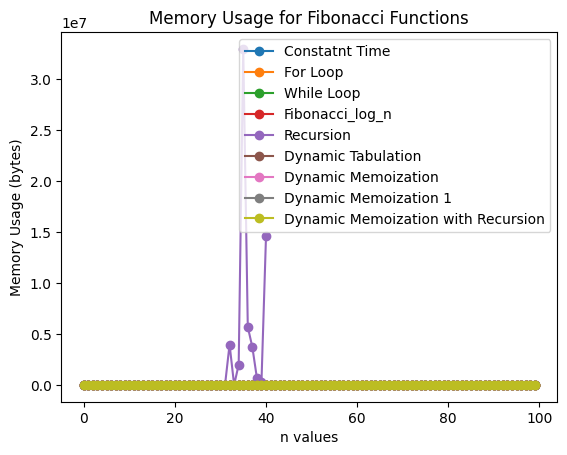

In [45]:
# Plot the results
for func_name, memory_usage_list in memory_usage_lists.items():
    plt.plot(n_values[:len(memory_usage_list)], memory_usage_list, marker='o', label=func_name)

plt.xlabel('n values')
plt.ylabel('Memory Usage (bytes)')
plt.title('Memory Usage for Fibonacci Functions')
plt.legend()
plt.show()